--- Numerical Simulation Results ---

1. Simulation Setup:
  - Initial Principal / Investment: $100,000.00
  - Simulation Duration: 10 years
  - Calculation Frequency: 1 time(s) per year

  Riba (Conventional Loan) System Parameters:
  - Annual Interest Rate: 8.00%

  Non-Riba (Profit-and-Loss Sharing) System Parameters:
  - Expected Annual Project Return: 12.00%
  - Annual Project Volatility (Risk): 15.00%
  - Financier's Share of Profit: 50.00%
  - (Note: PLS results depend on random simulated project outcomes based on expected return and volatility)

2. Simulation Results (End of Period):

  Riba System:
  - Final Amount Owed by Borrower: $215,892.50
  - Total Interest Charged: $115,892.50

  Non-Riba (PLS) System:
  - Final Financier Claim: $242,014.16
  - Net Financier Gain/(Loss) from PLS: $142,014.16

  PLS Project Performance (Simulated for this run):
  - Average Actual Annual Return Rate: 18.72%
  - Std Dev of Actual Annual Returns: 10.29%


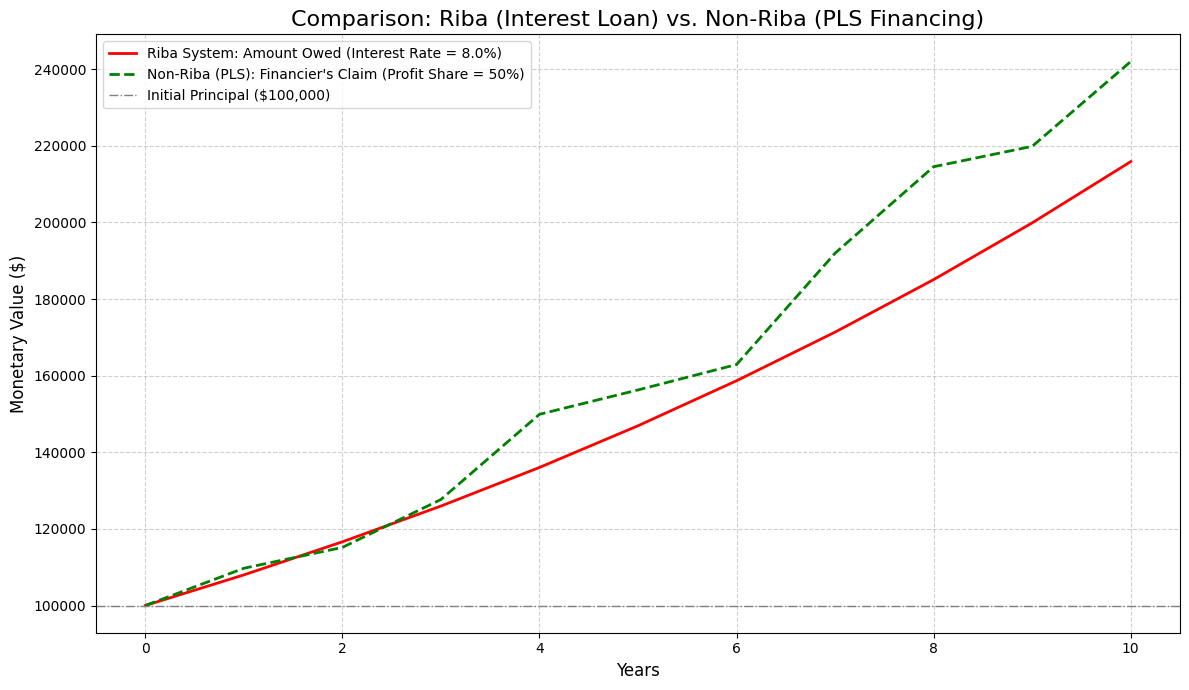


--- Interpretation ---
The graph and numerical results illustrate key differences:
1. Certainty vs. Uncertainty:
   - Riba System: The amount owed grows predictably and exponentially based on the fixed interest rate. The lender's return is predetermined (absent default).
   - Non-Riba (PLS) System: The financier's claim fluctuates based on the simulated success or failure of the underlying project. The path is uncertain and depends on the actual returns achieved, reflecting shared risk.

2. Risk Bearing:
   - Riba System: The borrower bears the primary risk. They must repay the loan plus interest regardless of whether their venture succeeded or failed.
   - Non-Riba (PLS) System: The financier shares in the risk. If the project performs poorly (negative returns), the financier's claim decreases (they bear the financial loss). If it performs well, they share in the profits.

3. Nature of Return:
   - Riba System: Lender's return is interest – a charge for the use of money over time.
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Setup Parameters ---

PRINCIPAL = 100000  # Initial amount needed / invested
DURATION_YEARS = 10
PERIODS_PER_YEAR = 1 # Calculations done annually for simplicity
TOTAL_PERIODS = DURATION_YEARS * PERIODS_PER_YEAR

# Riba System Parameters
INTEREST_RATE_ANNUAL = 0.08 # 8% annual interest

# Non-Riba (PLS) System Parameters
# We need to simulate project performance for PLS
EXPECTED_PROJECT_RETURN_ANNUAL = 0.12 # Project is expected to return 12% per year on average
PROJECT_VOLATILITY_ANNUAL = 0.15    # Standard deviation of project returns (risk factor)
PROFIT_SHARING_RATIO_FINANCIER = 0.50 # Financier gets 50% of the generated profit
# The entrepreneur gets the remaining (1 - PROFIT_SHARING_RATIO_FINANCIER) = 50%

# For reproducibility of random project outcomes in PLS
np.random.seed(42)

# --- Simulation Functions ---

def simulate_riba_loan(principal, annual_rate, duration_years, periods_per_year):
    """Simulates the growth of debt under a Riba (compound interest) system."""
    rate_per_period = annual_rate / periods_per_year
    total_periods = duration_years * periods_per_year
    balances = [principal]
    current_balance = principal

    for period in range(total_periods):
        interest_charged = current_balance * rate_per_period
        current_balance += interest_charged
        balances.append(current_balance)

    return balances

def simulate_pls_financing(principal, expected_return, volatility, profit_sharing_ratio, duration_years, periods_per_year):
    """Simulates the financier's claim under a non-Riba (PLS) system."""
    total_periods = duration_years * periods_per_year
    # We track both the project's value and the financier's specific claim
    project_values = [principal]
    financier_claims = [principal] # Initially, financier's claim is the capital provided
    period_returns = [] # To store the simulated returns for analysis

    current_project_value = principal
    current_financier_claim = principal

    # Adjust return and volatility for the period length (simple scaling for this example)
    # More complex models might use geometric scaling, but arithmetic is fine here.
    expected_return_per_period = expected_return / periods_per_year
    volatility_per_period = volatility / np.sqrt(periods_per_year) # Scale volatility with sqrt(T)

    for period in range(total_periods):
        # Simulate the project's return for this period
        # Use normal distribution: mean = expected return, std dev = volatility
        actual_period_return_rate = np.random.normal(expected_return_per_period, volatility_per_period)
        period_returns.append(actual_period_return_rate)

        # Calculate profit or loss amount based on the *current* project value
        # Note: In a strict Mudarabah, returns are calculated on the initial capital,
        # but simulating growth/loss of the underlying asset value is more realistic for multi-period ventures.
        # Let's calculate return on the *financier's current claim* as a proxy for their share of capital driving returns.
        # A more complex model could track separate pools of capital if needed.
        # We'll use the financier's claim at the start of the period to calculate the return attributable to their capital.

        return_on_financier_capital = current_financier_claim * actual_period_return_rate

        # Update total project value (optional but good for context)
        # Assuming for simplicity the return applies proportionally to the whole project value
        # This part is illustrative as the focus is on the financier's claim based on PLS rules.
        # A better model might have the entrepreneur contributing too, changing project value dynamics.
        # Let's keep it simple: the change is driven by return on financier's capital for now.
        current_project_value += return_on_financier_capital # Simplified view

        if return_on_financier_capital > 0: # Profit occurred
            profit = return_on_financier_capital
            financier_share = profit * profit_sharing_ratio
            entrepreneur_share = profit * (1 - profit_sharing_ratio) # Entrepreneur gets this part

            # Financier's claim increases by their share of the profit
            current_financier_claim += financier_share

        else: # Loss occurred (or zero return)
            loss = return_on_financier_capital # This will be negative or zero
            # Financier bears the financial loss up to their invested capital
            current_financier_claim += loss
            # Ensure financier's claim doesn't go below zero
            current_financier_claim = max(0, current_financier_claim)
            # Entrepreneur bears no financial loss (loses time/effort)

        project_values.append(current_project_value) # Track illustrative project value
        financier_claims.append(current_financier_claim)

    return financier_claims, project_values, period_returns

# --- Run Simulations ---

# Riba Simulation
riba_balances = simulate_riba_loan(PRINCIPAL, INTEREST_RATE_ANNUAL, DURATION_YEARS, PERIODS_PER_YEAR)

# Non-Riba (PLS) Simulation
pls_financier_claims, pls_project_values, pls_period_returns = simulate_pls_financing(
    PRINCIPAL,
    EXPECTED_PROJECT_RETURN_ANNUAL,
    PROJECT_VOLATILITY_ANNUAL,
    PROFIT_SHARING_RATIO_FINANCIER,
    DURATION_YEARS,
    PERIODS_PER_YEAR
)

# Time axis for plotting
years = np.linspace(0, DURATION_YEARS, TOTAL_PERIODS + 1)

# --- Numerical Simulation and Results ---

print("--- Numerical Simulation Results ---")
print("\n1. Simulation Setup:")
print(f"  - Initial Principal / Investment: ${PRINCIPAL:,.2f}")
print(f"  - Simulation Duration: {DURATION_YEARS} years")
print(f"  - Calculation Frequency: {PERIODS_PER_YEAR} time(s) per year")
print("\n  Riba (Conventional Loan) System Parameters:")
print(f"  - Annual Interest Rate: {INTEREST_RATE_ANNUAL:.2%}")
print("\n  Non-Riba (Profit-and-Loss Sharing) System Parameters:")
print(f"  - Expected Annual Project Return: {EXPECTED_PROJECT_RETURN_ANNUAL:.2%}")
print(f"  - Annual Project Volatility (Risk): {PROJECT_VOLATILITY_ANNUAL:.2%}")
print(f"  - Financier's Share of Profit: {PROFIT_SHARING_RATIO_FINANCIER:.2%}")
print(f"  - (Note: PLS results depend on random simulated project outcomes based on expected return and volatility)")

print("\n2. Simulation Results (End of Period):")
final_riba_owed = riba_balances[-1]
final_pls_claim = pls_financier_claims[-1]
total_interest_paid = final_riba_owed - PRINCIPAL
# Total profit share is harder to pin down without tracking repayments,
# but the final claim reflects the accumulated profit share (or loss).
# Let's calculate the net gain/loss for the financier in PLS.
net_pls_financier_gain_loss = final_pls_claim - PRINCIPAL

print(f"\n  Riba System:")
print(f"  - Final Amount Owed by Borrower: ${final_riba_owed:,.2f}")
print(f"  - Total Interest Charged: ${total_interest_paid:,.2f}")

print(f"\n  Non-Riba (PLS) System:")
print(f"  - Final Financier Claim: ${final_pls_claim:,.2f}")
print(f"  - Net Financier Gain/(Loss) from PLS: ${net_pls_financier_gain_loss:,.2f}")

# We can also look at the simulated project returns
avg_simulated_return = np.mean(pls_period_returns)
std_dev_simulated_return = np.std(pls_period_returns)
print(f"\n  PLS Project Performance (Simulated for this run):")
print(f"  - Average Actual Annual Return Rate: {avg_simulated_return:.2%}")
print(f"  - Std Dev of Actual Annual Returns: {std_dev_simulated_return:.2%}")


# --- Graphical Results ---

plt.figure(figsize=(12, 7))

# Plot Riba System Outcome
plt.plot(years, riba_balances, label=f'Riba System: Amount Owed (Interest Rate = {INTEREST_RATE_ANNUAL:.1%})', color='red', linewidth=2)

# Plot Non-Riba (PLS) System Outcome
plt.plot(years, pls_financier_claims, label=f'Non-Riba (PLS): Financier\'s Claim (Profit Share = {PROFIT_SHARING_RATIO_FINANCIER:.0%})', color='green', linewidth=2, linestyle='--')

# Optional: Plot the underlying project value in PLS for context
# plt.plot(years, pls_project_values, label='PLS: Simulated Project Value (Illustrative)', color='blue', linestyle=':', linewidth=1)

# Add labels and title
plt.title('Comparison: Riba (Interest Loan) vs. Non-Riba (PLS Financing)', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Monetary Value ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y') # Avoid scientific notation

# Highlight Initial Principal
plt.axhline(PRINCIPAL, color='grey', linestyle='-.', linewidth=1, label=f'Initial Principal (${PRINCIPAL:,.0f})')
# Re-call legend to include the axhline label if needed, or add manually via text.
handles, labels = plt.gca().get_legend_handles_labels()
# Add principal line label if not already included by axhline's label param
if f'Initial Principal (${PRINCIPAL:,.0f})' not in labels:
     handles.append(plt.Line2D([0], [0], color='grey', linestyle='-.', linewidth=1))
     labels.append(f'Initial Principal (${PRINCIPAL:,.0f})')
plt.legend(handles, labels, fontsize=10)


plt.tight_layout()
plt.show()

# --- Interpretation ---
print("\n--- Interpretation ---")
print("The graph and numerical results illustrate key differences:")
print("1. Certainty vs. Uncertainty:")
print("   - Riba System: The amount owed grows predictably and exponentially based on the fixed interest rate. The lender's return is predetermined (absent default).")
print("   - Non-Riba (PLS) System: The financier's claim fluctuates based on the simulated success or failure of the underlying project. The path is uncertain and depends on the actual returns achieved, reflecting shared risk.")
print("\n2. Risk Bearing:")
print("   - Riba System: The borrower bears the primary risk. They must repay the loan plus interest regardless of whether their venture succeeded or failed.")
print("   - Non-Riba (PLS) System: The financier shares in the risk. If the project performs poorly (negative returns), the financier's claim decreases (they bear the financial loss). If it performs well, they share in the profits.")
print("\n3. Nature of Return:")
print("   - Riba System: Lender's return is interest – a charge for the use of money over time.")
print("   - Non-Riba (PLS) System: Financier's return is a share of the actual profit generated by the venture funded by their capital.")
print("\nNote: The specific outcome of the PLS simulation depends heavily on the random numbers generated based on the expected return and volatility parameters. Running the simulation multiple times would show a range of possible outcomes for the PLS system, while the Riba outcome remains the same.")